# Enter Student Name & ID

In [1]:
student_id = 400101656
student_name = "Pantea Amoie"

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400101656
your name: Pantea Amoie


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [2]:
import numpy as np

In [3]:
def myPCA(X, num):

    # Centering data
    X_c = X - np.mean(X, axis=0)
    # Calculating its covarience
    cov = np.cov(X_c, rowvar=False)
    # Eigenvalues and eigenvectors of the cov matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    # Sorting the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    # Making an array of the first "num" eigenvectors(first num principal components)
    top_eigenvectors = sorted_eigenvectors[:, :num]
    # Projected data(in the direction of the first "num" principal components)
    X_proj = np.dot(X_c, top_eigenvectors)

    return X_proj, sorted_eigenvalues, sorted_eigenvectors


### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

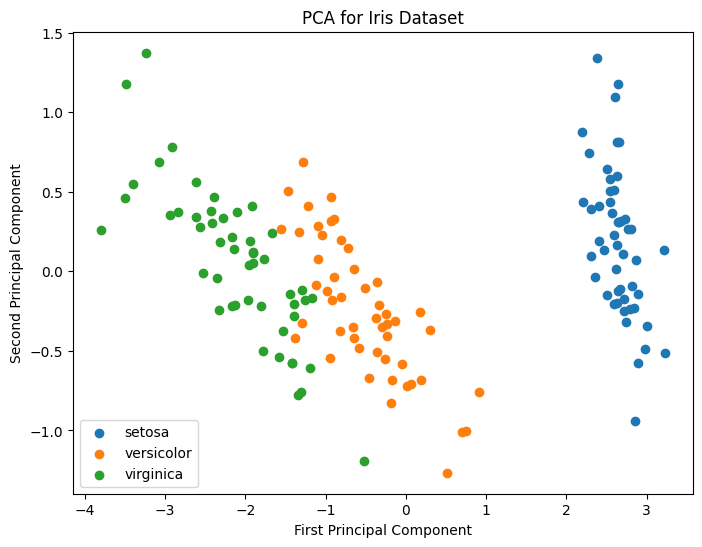

In [5]:
# Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
# Performing my PCA function on the IRIS dataset(reducing to 2D)
X_proj, eigenvalues, eigenvectors = myPCA(X, 2)
# Plotting the results
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_proj[y == label, 0], X_proj[y == label, 1], label=iris.target_names[label])

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA for Iris Dataset')
plt.legend()
plt.show()


## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `\
Informally, eigenfaces can be considered a set of "standardized face ingredients", derived from statistical analysis of many pictures of faces. Any human face can be considered to be a combination of these standard faces. Eigenfaces refer to the set of eigenvectors used in the computer vision problem of human face recognition. These eigenvectors are derived from the covariance matrix of a dataset of face images. Each eigenface represents a particular "direction" in the high-dimensional space of face images, capturing a different aspect of facial variability (such as lighting conditions, facial expressions, and slight variations in pose).\
Eigenfaces are related to Principal Component Analysis (PCA) because they are computed using PCA on a dataset of face images.\
Each face image is converted into a vector. If the image is of size (m x n), it is reshaped into a vector of size (mn). Therefore, a dataset of k face images can be represented as a matrix X of size (k x mn).\
The mean face image is computed and subtracted from each face image vector, centering the data around the origin in the high-dimensional space. The covariance matrix of the centered data is computed. This matrix captures the variance and the relationships between different pixels in the face images. PCA is applied to the covariance matrix to compute its eigenvalues and eigenvectors. The eigenvectors of the covariance matrix are called eigenfaces in the context of face recognition. These eigenvectors are sorted by the magnitude of their corresponding eigenvalues.\
A subset of the eigenfaces corresponding to the largest eigenvalues is selected. These eigenfaces form a lower-dimensional subspace that captures most of the variance in the face dataset. Each face image can then be projected onto this subspace, reducing its dimensionality while preserving important features.\
In face recognition, a new face image is projected onto the eigenface subspace to obtain its lower-dimensional representation. This representation can then be compared with the representations of known faces using various distance metrics to identify or verify the person.

### 2.2 Read the given dataset and create train and test matrices.
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

In [6]:
pip install --upgrade opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 7.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76


In [7]:
import zipfile
import os
import cv2
import numpy as np

# Extract the ZIP file
zip_file_path = 'FacesDataset1.zip'
extract_dir = 'FacesDataset1_extracted'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify the extraction
print("Extracted files:")
for root, dirs, files in os.walk(extract_dir):
    for name in dirs:
        print(os.path.join(root, name))
    for name in files:
        print(os.path.join(root, name))

# Function to load ORL data from the extracted folder
def load_ORL_data(data_folder):
    X_train = []
    X_test = []
    y_train = []
    y_test = []

    # Loop through each person's folder
    for person_id in range(1, 41):  # There are 40 persons (folders)
        folder_path = os.path.join(data_folder, f"ORL/s{person_id}")
        print(f"Checking folder path: {folder_path}")

        images = []
        labels = []
        # Read the images for the current person
        for image_id in range(1, 11):  # Each person has 10 images
            image_path = os.path.join(folder_path, f"{image_id}.bmp")
            print(f"Trying to read image: {image_path}")
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Check if the image was successfully read
            if image is None:
                print(f"Warning: Could not read image {image_path}. Skipping.")


            # Flatten the image and store it in the list
            images.append(image.flatten())
            labels.append(person_id - 1)  # Convert person_id to 0-based index

        # Split the images into training and testing sets
        X_train.extend(images[:5])  # First 5 images for training
        X_test.extend(images[5:])   # Next 5 images for testing
        y_train.extend(labels[:5])
        y_test.extend(labels[5:])

    # Convert lists to numpy arrays
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    return X_train, X_test, y_train, y_test

# Load the ORL data
X_train, X_test, y_train, y_test = load_ORL_data(extract_dir)

# Print the shapes of the data to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Extracted files:
FacesDataset1_extracted/ORL
FacesDataset1_extracted/ORL/s18
FacesDataset1_extracted/ORL/s7
FacesDataset1_extracted/ORL/s26
FacesDataset1_extracted/ORL/s27
FacesDataset1_extracted/ORL/s40
FacesDataset1_extracted/ORL/s20
FacesDataset1_extracted/ORL/s2
FacesDataset1_extracted/ORL/s39
FacesDataset1_extracted/ORL/s22
FacesDataset1_extracted/ORL/s33
FacesDataset1_extracted/ORL/s25
FacesDataset1_extracted/ORL/s1
FacesDataset1_extracted/ORL/s4
FacesDataset1_extracted/ORL/s19
FacesDataset1_extracted/ORL/s23
FacesDataset1_extracted/ORL/s16
FacesDataset1_extracted/ORL/s13
FacesDataset1_extracted/ORL/s5
FacesDataset1_extracted/ORL/s6
FacesDataset1_extracted/ORL/s36
FacesDataset1_extracted/ORL/s12
FacesDataset1_extracted/ORL/s35
FacesDataset1_extracted/ORL/s8
FacesDataset1_extracted/ORL/s11
FacesDataset1_extracted/ORL/s10
FacesDataset1_extracted/ORL/s14
FacesDataset1_extracted/ORL/s30
FacesDataset1_extracted/ORL/s17
FacesDataset1_extracted/ORL/s31
FacesDataset1_extracted/ORL/s28
Fa

### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [8]:
# Perform PCA on the training data, reducing it to 50 dimensions
num_components = 50
X_train_pca, eigenvalues, eigenvectors = myPCA(X_train, num_components)

# Project the test data using the same principal components
X_test_pca = np.dot(X_test - np.mean(X_train, axis=0), eigenvectors[:, :num_components])

# Print the shapes of the transformed data
print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)

X_train_pca shape: (200, 50)
X_test_pca shape: (200, 50)


### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [10]:
# Initialize the LDA classifier
lda = LDA()

# Train the LDA classifier on the PCA-transformed training data
lda.fit(X_train_pca, y_train)

# Predict the labels for the PCA-transformed test data
y_pred = lda.predict(X_test_pca)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("LDA Classifier Accuracy on PCA-Transformed Data:", accuracy)

LDA Classifier Accuracy on PCA-Transformed Data: 0.92


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


In [11]:
# Function to perform PCA and LDA and report accuracy
def perform_pca_lda(num_components):
    # Perform PCA on the training data
    X_train_pca, eigenvalues, eigenvectors = myPCA(X_train, num_components)

    # Project the test data using the same principal components
    X_test_pca = np.dot(X_test - np.mean(X_train, axis=0), eigenvectors[:, :num_components])

    # Train the LDA classifier on the PCA-transformed training data
    lda = LDA()
    lda.fit(X_train_pca, y_train)

    # Predict the labels for the PCA-transformed test data
    y_pred = lda.predict(X_test_pca)

    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

Number of components: 100, Accuracy: 0.8850
Number of components: 95, Accuracy: 0.9250
Number of components: 90, Accuracy: 0.9200
Number of components: 85, Accuracy: 0.9200
Number of components: 80, Accuracy: 0.9200
Number of components: 75, Accuracy: 0.9300
Number of components: 70, Accuracy: 0.9150
Number of components: 65, Accuracy: 0.9100
Number of components: 60, Accuracy: 0.9050
Number of components: 55, Accuracy: 0.9150
Number of components: 50, Accuracy: 0.9200
Number of components: 45, Accuracy: 0.9250
Number of components: 40, Accuracy: 0.9400


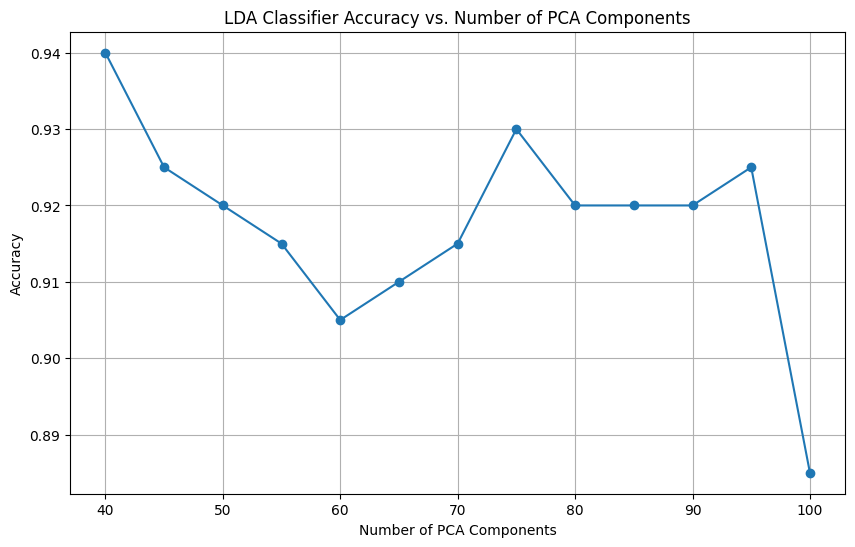

The optimal number of PCA components is 40 with an accuracy of 0.9400


In [12]:
# List of number of PCA components to test
num_components_list = list(range(100, 39, -5))

# List to store accuracy results
accuracy_results = []

# Perform PCA and LDA for each number of components and store the accuracy
for num_components in num_components_list:
    accuracy = perform_pca_lda(num_components)
    accuracy_results.append(accuracy)
    print(f"Number of components: {num_components}, Accuracy: {accuracy:.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(num_components_list, accuracy_results, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('LDA Classifier Accuracy vs. Number of PCA Components')
plt.grid(True)
plt.show()

# Determine the sufficient number of components
max_accuracy = max(accuracy_results)
optimal_components = num_components_list[accuracy_results.index(max_accuracy)]

print(f"The optimal number of PCA components is {optimal_components} with an accuracy of {max_accuracy:.4f}")